# **ANN Implementation with 1 hidden layer**

In [12]:
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam # optimiser
from tensorflow.keras.datasets import fashion_mnist # dataset
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Train:", x_train.shape, "Test:", x_test.shape)

Train: (60000, 28, 28) Test: (10000, 28, 28)


In [14]:
print(x_train.shape[0])  # (number of training images)
print(x_train.shape[1])  # (image height)
print(x_train.shape[2])  # (image width)

60000
28
28


In [15]:
x_train = x_train.reshape(-1, 28*28) # 3D into 2D
x_test = x_test.reshape(-1, 28*28) # 3D into 2D
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
x_train = x_train.astype('float32') / 255 #dividing by 255 for normalization
x_test = x_test.astype('float32') / 255

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[:5])

[9 0 0 3 0]


In [ ]:
# Define a Sequential model (layer by layer)
model = Sequential([
    # First dense (fully connected) layer:
    # - 128 neurons
    # - ReLU activation
    # - Input shape is 784 (flattened 28x28 image)
    Dense(128, activation='relu', input_shape=(28*28,)),
    
    # Dropout layer:
    # - Randomly drops 30% of neurons during training
    # - Helps to prevent overfitting
    Dropout(0.3),
    
    # Output layer:
    # - 10 neurons (one for each class)
    # - Softmax activation to output class probabilities
    Dense(10, activation='softmax')
])

# Compile the model:
# - Adam optimizer (adaptive learning rate, very popular)
# - Categorical Crossentropy loss (for multi-class classification)
# - Track accuracy during training
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# model training
history = model.fit(x_train, y_train_cat, epochs=20, batch_size=64, validation_data=(x_test, y_test_cat))

# model evaluation
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest accuracy: {test_acc:.4f}")

# classification report
y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7355 - loss: 0.7599 - val_accuracy: 0.8420 - val_loss: 0.4402
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8429 - loss: 0.4398 - val_accuracy: 0.8609 - val_loss: 0.3994
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8611 - loss: 0.3857 - val_accuracy: 0.8543 - val_loss: 0.4000
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8642 - loss: 0.3719 - val_accuracy: 0.8675 - val_loss: 0.3676
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8718 - loss: 0.3476 - val_accuracy: 0.8683 - val_loss: 0.3600
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8748 - loss: 0.3389 - val_accuracy: 0.8711 - val_loss: 0.3568
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8784 - loss: 0.3336 - val_accuracy: 0.8672 - val_loss: 0.3591
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8849 - loss: 0.3117 - val_accuracy: 0

**Confusion Matrix**

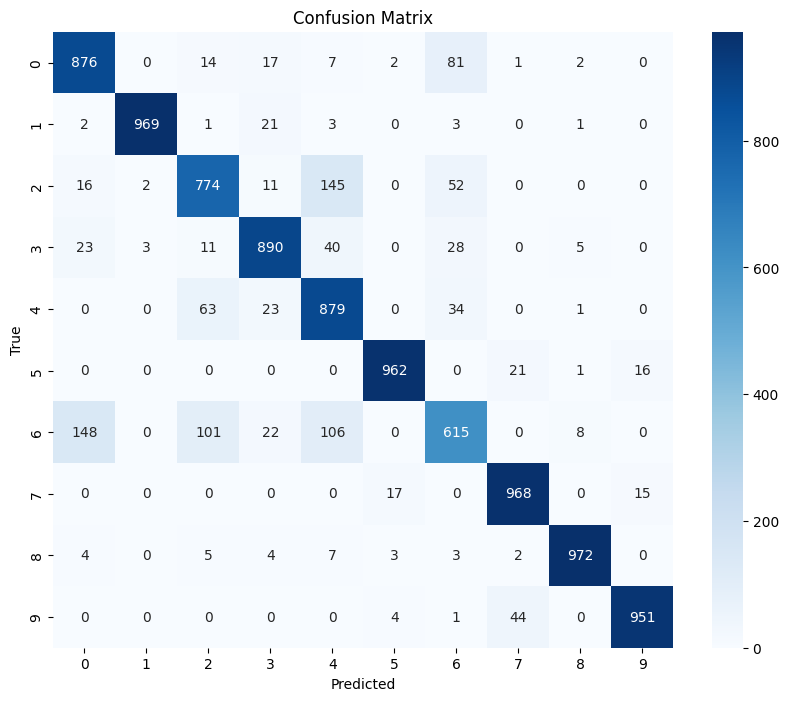

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Loss and Accuracy curves**

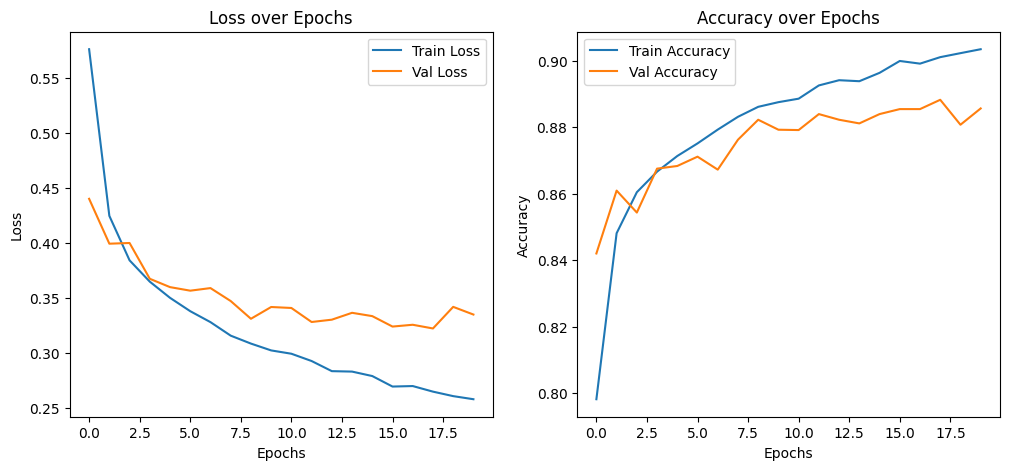

In [ ]:
# Set the figure size (width 12 inches, height 5 inches)
plt.figure(figsize=(12, 5))

# Plot 1: Loss Curves
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st plot)
plt.plot(history.history['loss'], label='Train Loss')       # Training loss
plt.plot(history.history['val_loss'], label='Val Loss')     # Validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Plot 2: Accuracy Curves
plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd plot)
plt.plot(history.history['accuracy'], label='Train Accuracy')     # Training accuracy
plt.plot(history.history['val_accuracy'], label='Val Accuracy')   # Validation accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Display the plots
plt.show()